# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Table of Contents  

Step 1. Open the data file and study the general information.  
Step 2. Data Preprocessing  
Step 3. Make calculations and add them to the table   
Step 4. Carry out eploratroy data analysis   
Step 5. Overal Conclusion



### Step 1. Open the data file and study the general information.

In [ ]:
import pandas as pd
vehicles = pd.read_csv('/datasets/vehicles_us.csv')

In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
print(vehicles['price'].value_counts())
print(vehicles['model_year'].value_counts())
print(vehicles['model'].value_counts())
print(vehicles['condition'].value_counts())
print(vehicles['cylinders'].value_counts())
print(vehicles['fuel'].value_counts())
print(vehicles['odometer'].value_counts())
print(vehicles['fuel'].value_counts())
print(vehicles['type'].value_counts())
print(vehicles['paint_color'].value_counts())
print(vehicles['is_4wd'].value_counts())
print(vehicles['date_posted'].value_counts())
print(vehicles['days_listed'].value_counts())

1         798
6995      719
5995      655
4995      624
3500      620
         ... 
49988       1
36600       1
300000      1
39873       1
11762       1
Name: price, Length: 3443, dtype: int64
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64
excellent    24773
good         20145
like new      4742
fair          1607
new            143
sa

In [ ]:
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [ ]:
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

Missing data:

* The column with the most missing data is the is-4wd column. From what I see, the missing data represents vehicles that are not 4wd. Once filled in with 0 to represent vehicles that are not 4wd, the columns were completely filled in and left with no NaNs or blanks (see below).  
*  Model-year, cylinders, odometer and paint-color were the other four columns with missing data. I suspect that they were left blank due to human error. Model-year, cylinders and paint-color are impossible to fill in without more data. However, I opted to fill in the NaN rows in the odometer column with the average odometer reading for the entire set (see below).


### Step 2. Data preprocessing

In [ ]:
vehicles['paint_color'] = vehicles['paint_color'].fillna(value='')

vehicles['is_4wd'] = vehicles['is_4wd'].fillna(value='0')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('int')
print(vehicles.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV                   1  2018-06-23           19  
1    automat

### Conclusion  
* Using .info(), I found that five columns were missing data.  I decided to start with the two easiest columns to change: is_4wd and paint_color.  

* I changed is_4wd empty values to 0 (or no) as the vehicles with 1 seem to be vehicles that are generally 4wd, and those that had been left empty seemed to be non 4wd types of vehicles.  I then converted the numbers in the column to int64 so I could perform calculations on them later.  

* I also decided to use fillna to fill in missing data from the paint_color column with blanks ('').


In [ ]:
#vehicles['model_year'] = vehicles['model_year'].fillna(value='0')
#vehicles['cylinders'] = vehicles['cylinders'].fillna(value='0')

vehicles.dropna(subset = ['model_year','cylinders'], inplace = True)

vehicles['model_year'] = vehicles['model_year'].astype('int')
vehicles['cylinders'] = vehicles['cylinders'].astype('int')
#print(vehicles.head(10))
print(vehicles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43009 entries, 0 to 51524
Data columns (total 13 columns):
price           43009 non-null int64
model_year      43009 non-null int64
model           43009 non-null object
condition       43009 non-null object
cylinders       43009 non-null int64
fuel            43009 non-null object
odometer        36419 non-null float64
transmission    43009 non-null object
type            43009 non-null object
paint_color     43009 non-null object
is_4wd          43009 non-null int64
date_posted     43009 non-null object
days_listed     43009 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 4.6+ MB
None


### Conclusion  
* I then decided to work on the columns, model_year, and cylinders. I wasn't quite sure what to do here. I considered
converting the empty columns to 0 but opted not to as model years and cylinders cannot equal 0.
I also worried that the 0's would impact any subsequent calculations negatively.

* Initially, I decided to delete the rows as they represented a small fraction of the total rows.  Later, however, instead of deleting the rows with NaN, I changed the NaNs to blanks, so that I could keep the additional rows for future calculations.  

* Then, I converted the remaining rows to int64 in order to be able to perform calculation on them more easily later.




In [ ]:

#avg_odometer = vehicles.loc[vehicles['odometer']== 'NaN', 'odoemter']

#odometer_by_model_year = vehicles.groupby('model_year')['odometer'].mean()

#for this_year in odometer_by_model_year.index:
    #vehicles.loc[(vehicles['model_year']== this_year) & (vehicles['odometer'].isnull()) , 'odometer']=odometer_by_model_year[this_year]

avg_odometer = vehicles['odometer'].mean()

vehicles['odometer'] = vehicles['odometer'].fillna(value=avg_odometer)

vehicles['odometer'] = vehicles['odometer'].astype('int')

print(vehicles.head(10))



    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5       good          6  gas   
2    5500        2013            hyundai sonata   like new          4  gas   
3    1500        2003                ford f-150       fair          8  gas   
4   14900        2017              chrysler 200  excellent          4  gas   
5   14990        2014              chrysler 300  excellent          6  gas   
6   12990        2015              toyota camry  excellent          4  gas   
7   15990        2013               honda pilot  excellent          6  gas   
8   11500        2012               kia sorento  excellent          4  gas   
10  19500        2011  chevrolet silverado 1500  excellent          8  gas   
11   8990        2012              honda accord  excellent          4  gas   

    odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0     145000    automatic     SUV                   1  2018-

### Conclusion  
* Finally, I decided to tackle the odometer column.
I began by filling in the NaN columns with the average (mean) odometer reading of all the columns.
I then changed the numbers to int64.

* I also considered writing code to get the average odometer reading by year but opted to go with the general overall
mean in the end.  

In [ ]:
print('Duplicate entries in the table:', vehicles.duplicated().sum())
vehicles = vehicles.drop_duplicates()

Duplicate entries in the table: 0


In [ ]:
vehicles['model'].unique()

array(['bmw x5', 'hyundai sonata', 'ford f-150', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'toyota rav4', 'chevrolet silverado',
       'jeep wrangler', 'chevrolet malibu', 'ford fusion se',
       'chevrolet impala', 'chevrolet corvette', 'jeep liberty',
       'toyota camry le', 'nissan altima', 'subaru outback',
       'toyota highlander', 'dodge charger', 'chevrolet equinox',
       'nissan rogue', 'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'jeep grand cherokee laredo',
       'nissan versa', 'ford f-250 sd', 

### Step 3. Make calculations and add them to the table  
* In this section, I broke down and converted multiple items of data thereby creating new columns that allowed for a more detailed analysis of the data.  


In [ ]:
#Convert to datetime to make readable for pandas

vehicles['date_posted']= pd.to_datetime(vehicles['date_posted'], format='%Y.%m.%d')
print(vehicles['date_posted'].head())

0   2018-06-23
2   2019-02-07
3   2019-03-22
4   2019-04-02
5   2018-06-20
Name: date_posted, dtype: datetime64[ns]


In [ ]:
#Calculate the weekday that ads were posted

vehicles['weekday'] = vehicles['date_posted'].dt.weekday
print(vehicles.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    115323   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  
0    automatic     SUV                   1  2018-06-23           19        5  
2    automatic   sedan         red       0  2019-02-07           79        3  
3    automatic  pickup                   0  2019-03-22            9        4  
4    automatic   sedan       black       0  2019-04-02           28        1  
5    automatic   sedan       black       1  2018-06-20           15        2  


In [ ]:
#Extract year posted in a separtae column

vehicles['year_posted'] = pd.DatetimeIndex(vehicles['date_posted']).year
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    115323   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV                   1  2018-06-23           19        5   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup                   0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   
5    automatic   sedan       black       1  2018-06-20           15        2   

   year_posted  
0         2018  
2         2019  
3    

In [ ]:
#Extract month posted in a separate column

vehicles['month_posted'] = pd.DatetimeIndex(vehicles['date_posted']).month
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    115323   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV                   1  2018-06-23           19        5   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup                   0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   
5    automatic   sedan       black       1  2018-06-20           15        2   

   year_posted  month_posted  
0         2018           

In [ ]:
#Calculate vehicles age when ad was placed

for element in vehicles:
    vehicles['sell_age'] = vehicles['year_posted'] - vehicles['model_year']

vehicles['float_sell_age'] = vehicles['sell_age'].astype('float')
vehicles.loc[vehicles['sell_age'] == 0, 'float_sell_age'] = 0.5

print(vehicles.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    115323   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV                   1  2018-06-23           19        5   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup                   0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   
5    automatic   sedan       black       1  2018-06-20           15        2   

   year_posted  month_posted  sell_age  float_sell_age  

In [ ]:
#Calculate average mileage per year

for element in vehicles:
    vehicles['avg_mileage'] = vehicles['odometer'] / (vehicles['float_sell_age'])

vehicles['avg_mileage'] = vehicles['avg_mileage'].astype('int')
#print(vehicles.info())
print(vehicles.head())
#print(vehicles[vehicles['sell_age'] == 0])
#vehicles.iloc[vehicles['sell_age'] == 0, 'sell_age'] = 0.5


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    115323   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV                   1  2018-06-23           19        5   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup                   0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   
5    automatic   sedan       black       1  2018-06-20           15        2   

   year_posted  month_posted  sell_age  float_sell_age  

In [ ]:
vehicles["condition"]= vehicles["condition"].replace("new", 5)
vehicles["condition"]= vehicles["condition"].replace("like new", 4)
vehicles["condition"]= vehicles["condition"].replace("excellent", 3)
vehicles["condition"]= vehicles["condition"].replace("good", 2)
vehicles["condition"]= vehicles["condition"].replace("fair", 1)
vehicles["condition"]= vehicles["condition"].replace("salvage", 0)

##numerical_condition = {'new' : 5, 'like new' : 4, 'excellent' : 3, 'good' : 2, 'fair' : 1, 'salvage' : 0}
##vehicles.replace({'new' : numerical_condition, 'like new' : numerical_condition, 'excellent' : numerical_condition, 'good' : numerical_condition, 'fair' : numerical_condition, 'salvage' : numerical_condition})


print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003      ford f-150          1          8  gas    115323   
4  14900        2017    chrysler 200          3          4  gas     80903   
5  14990        2014    chrysler 300          3          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV                   1  2018-06-23           19        5   
2    automatic   sedan         red       0  2019-02-07           79        3   
3    automatic  pickup                   0  2019-03-22            9        4   
4    automatic   sedan       black       0  2019-04-02           28        1   
5    automatic   sedan       black       1  2018-06-20           15        2   

   year_posted  month_posted  sell_age  float_sell_age  

In [ ]:
#Code for BoxPlot below:

vehicles["transmission"]= vehicles["transmission"].replace("automatic", 1)
vehicles["transmission"]= vehicles["transmission"].replace("manual", 2)
vehicles["transmission"]= vehicles["transmission"].replace("other", 3)


#numerical_transmission = {'automatic' : 1, 'manual' : 2, 'other' : 3}
#vehicles.replace({'automatic' : numerical_transmission, 'manual' : numerical_transmission, 'other' : numerical_transmission})
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year_posted,month_posted,sell_age,float_sell_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,1,SUV,,1,2018-06-23,19,5,2018,6,7,7.0,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,1,sedan,red,0,2019-02-07,79,3,2019,2,6,6.0,18333
3,1500,2003,ford f-150,1,8,gas,115323,1,pickup,,0,2019-03-22,9,4,2019,3,16,16.0,7207
4,14900,2017,chrysler 200,3,4,gas,80903,1,sedan,black,0,2019-04-02,28,1,2019,4,2,2.0,40451
5,14990,2014,chrysler 300,3,6,gas,57954,1,sedan,black,1,2018-06-20,15,2,2018,6,4,4.0,14488


### Step 4. Carry out exploratory data analysis

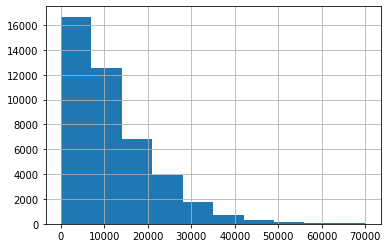

In [ ]:
#Initial histogram: Price

#vehicles.hist('price', range=0, 50000)
pd.Series(vehicles['price']).hist(range = (0, 70000))

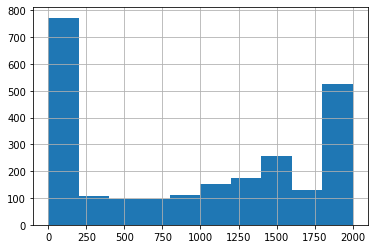

In [ ]:
pd.Series(vehicles['price']).hist(range = (0, 2000))

### Conclusion  

* Since it's not possible for vehicles to cost 0, I decided to break down the lower end of the price range into something more understandable.  Based on these histograms, I opted to remove all entries below 2000 and above 50000.  (Shown in code below)

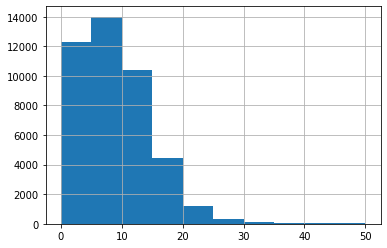

In [ ]:
#Initial histogram: sell_age

pd.Series(vehicles['sell_age']).hist(range = (0, 50))

### Conclusion

* Based on this histogram, I opted to remove all sell ages under 25 years.  I also decided to leave the sell age of 0 as some vehicles were sold in the the same year they were manufactured.  (Code below)

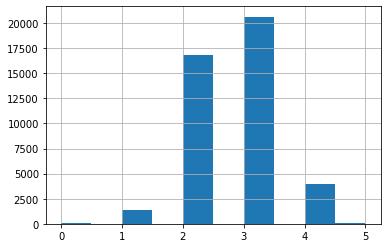

In [ ]:
#Initial histogram: condition

pd.Series(vehicles['condition']).hist(range = (0, 5))

### Conclusion  
* Based on this histogram, I opted to remove the conditions that fell into the 0 and 5 range.  (code below)

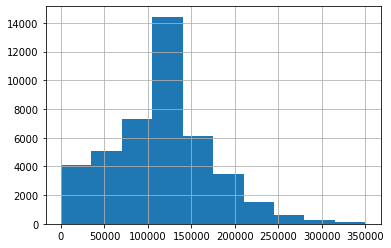

In [ ]:
#Initial histogram: Odometer

pd.Series(vehicles['odometer']).hist(range = (0, 350000))

### Conclusion  
* Based on this histogram, I opted to remove all entries above 275,000.  (code below)

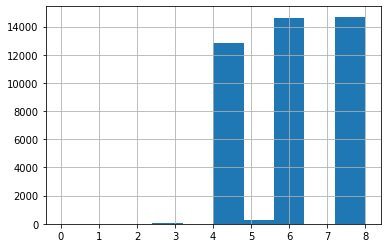

In [ ]:
#Initial histogram: cylinders

pd.Series(vehicles['cylinders']).hist(range = (0, 8))

### Conclusion  
* And finally, based on this histogram, I opted to remove all entries 3 and below.  (code below)

In [ ]:
#removing outliers

vehicles.query('price < 50000')
vehicles.query('price > 2000')
vehicles.query('sell_age < 25')
vehicles.query('condition > 0')
vehicles.query('condition > 5' )
vehicles.query('odometer < 275000')
vehicles.query('cylinders > 3')



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year_posted,month_posted,sell_age,float_sell_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,1,SUV,,1,2018-06-23,19,5,2018,6,7,7.0,20714
2,5500,2013,hyundai sonata,4,4,gas,110000,1,sedan,red,0,2019-02-07,79,3,2019,2,6,6.0,18333
3,1500,2003,ford f-150,1,8,gas,115323,1,pickup,,0,2019-03-22,9,4,2019,3,16,16.0,7207
4,14900,2017,chrysler 200,3,4,gas,80903,1,sedan,black,0,2019-04-02,28,1,2019,4,2,2.0,40451
5,14990,2014,chrysler 300,3,6,gas,57954,1,sedan,black,1,2018-06-20,15,2,2018,6,4,4.0,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,1,sedan,black,0,2018-10-03,37,2,2018,10,5,5.0,17627
51521,2700,2002,honda civic,0,4,gas,181500,1,sedan,white,0,2018-11-14,22,2,2018,11,16,16.0,11343
51522,3950,2009,hyundai sonata,3,4,gas,128000,1,sedan,blue,0,2018-11-15,32,3,2018,11,9,9.0,14222
51523,7455,2013,toyota corolla,2,4,gas,139573,1,sedan,black,0,2018-07-02,71,0,2018,7,5,5.0,27914


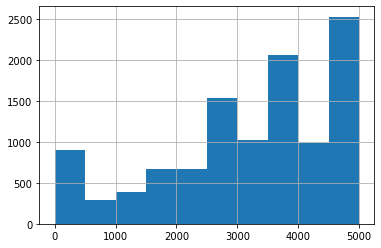

In [ ]:
#Updated histogram: price

pd.Series(vehicles['price']).hist(range = (0, 5000))

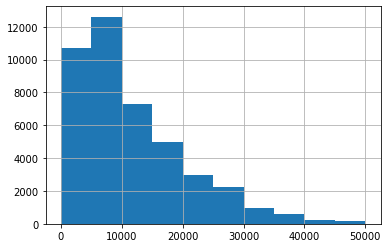

In [ ]:
#Updated Histogram: price

pd.Series(vehicles['price']).hist(range = (0, 50000))

### Conclusion  
* Based upon the updated histograms, it is evident that the majority of the vehicles range in price from 4500 to 20000.  

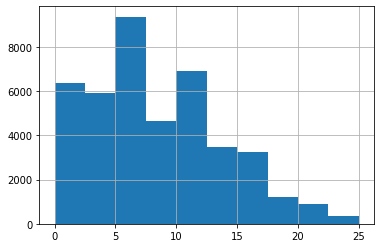

In [ ]:
#Updated Histogram: sell_age

pd.Series(vehicles['sell_age']).hist(range = (0, 25))

### Conclusion  
* Based upon the updated histogram, it is evident that the majority of vehicles range in age from 5-12 years of age.  

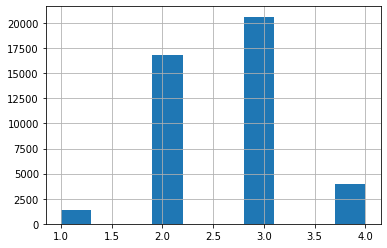

In [ ]:
#Updated Histogram: condition

pd.Series(vehicles['condition']).hist(range = (1, 4))

### Conclusion  
* Based upon the updated histogram, it is evident that the majority of the vehicle's conditions range from 2 to 3 or good and excellent.  

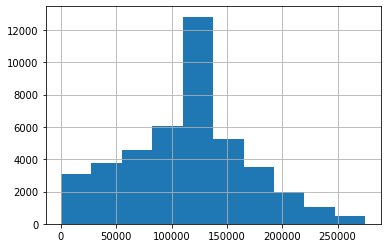

In [ ]:
#Updated Histogram: odometer

pd.Series(vehicles['odometer']).hist(range = (0, 275000))

### Conclusion  
* Based upon the updated histogram, it is evident that the majority of vehicles have odometer readings between 50,000 and 150,000 miles.  

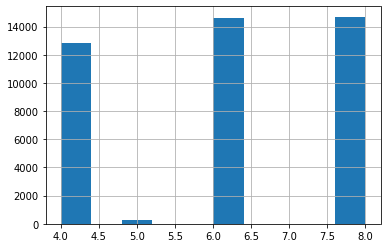

In [ ]:
#Updated Histogram: cylinders

pd.Series(vehicles['cylinders']).hist(range = (4, 8))

### Conclusion  
* Based upon the updated histogram, it is evident that most of the vehicles are 6 and 8 cylinders with a substantial number also being 4 cylinder.  

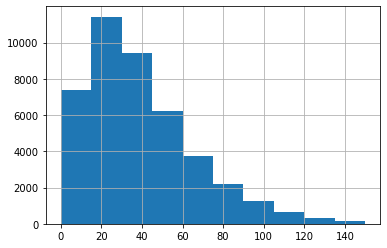

In [ ]:
#days listed histogram

pd.Series(vehicles['days_listed']).hist(range = (0, 150))

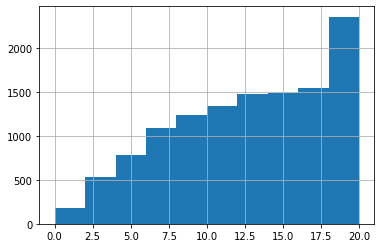

In [ ]:
#days listed histogram: edited in order to better understand how many vehicles were sold very quickly


pd.Series(vehicles['days_listed']).hist(range = (0, 20))

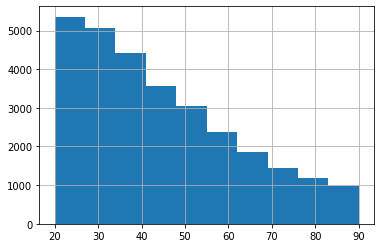

In [ ]:
pd.Series(vehicles['days_listed']).hist(range = (20, 90))

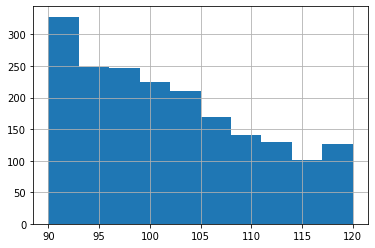

In [ ]:
#days listed histogram: edited in order to better understand how many vehicles were sold very slowly

pd.Series(vehicles['days_listed']).hist(range = (90, 120))

### Conclusion  
* The majority of vehicles were listed for 20 to 40 days.  With the average being 39 and the mean being 33 (see below.)

In [ ]:
#days listed: mean and median

print(vehicles['days_listed'].mean())
print(vehicles['days_listed'].median())

39.57367062707805
33.0


In [ ]:
vehicles['days_listed'].count()

vehicles_model_groupby = (vehicles.groupby('model').mean())

#print(vehicles_model_groupby)

In [ ]:
vehicles['model'].unique()

array(['bmw x5', 'hyundai sonata', 'ford f-150', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'toyota rav4', 'chevrolet silverado',
       'jeep wrangler', 'chevrolet malibu', 'ford fusion se',
       'chevrolet impala', 'chevrolet corvette', 'jeep liberty',
       'toyota camry le', 'nissan altima', 'subaru outback',
       'toyota highlander', 'dodge charger', 'chevrolet equinox',
       'nissan rogue', 'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'jeep grand cherokee laredo',
       'nissan versa', 'ford f-250 sd', 

In [ ]:
#grouping vehicles based on brand type

import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()
from collections import Counter



def vehicle_model_lemma(row):
    model = row['model']
    words = nltk.word_tokenize(model)
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]

    #print(Counter(lemmas))
    #return lemmas
    #was used for debugging


    if ('bmw' in lemmas):
        return 'BMW'
    elif 'hyundai' in lemmas:
        return 'Hyundai'
    elif 'ford' in lemmas:
        return 'Ford'
    elif 'chrysler' in lemmas:
        return 'Chrysler'
    elif 'toyota' in lemmas:
        return 'Toyota'
    elif 'honda' in lemmas:
        return 'Honda'
    elif ('ram' in lemmas) or ('dodge' in lemmas):
        return 'Dodge'
    elif 'ford' in lemmas:
        return 'Ford'
    elif 'gmc' in lemmas:
        return 'GMC'
    elif 'jeep' in lemmas:
        return 'Jeep'
    elif 'kia' in lemmas:
        return 'Kia'
    elif 'chevrolet' in lemmas:
        return 'Chevrolet'
    elif 'nissan' in lemmas:
        return 'Nissan'
    elif 'subaru' in lemmas:
        return 'Subaru'
    elif 'mercedes' in lemmas:
        return 'Mercedes'
    elif 'acura' in lemmas:
        return 'Acura'
    elif 'cadillac' in lemmas:
        return 'Cadillac'
    elif 'volkswagen' in lemmas:
        return 'Volkswagen'
    elif 'buick' in lemmas:
        return 'Buick'
    else:
        return 'other'




vehicles['model_category'] = vehicles.apply(vehicle_model_lemma, axis=1)

model_counts_variable = vehicles['model_category'].value_counts()
print("================")
print(model_counts_variable)
#print(type(model_counts_variable))
#print(vehicles.groupby('model_category').count())

Ford          10577
Chevrolet      8874
Toyota         4533
Dodge          3804
Honda          2921
Jeep           2721
Nissan         2671
GMC            2001
Subaru         1060
Hyundai         991
Volkswagen      724
Chrysler        690
Kia             478
Cadillac        268
Buick           234
BMW             231
Acura           200
other            31
Name: model_category, dtype: int64


### Conclusion  
* In this section, I began by using lemmas to group vehicles based on brand type.  I then used the new column to calculate the average price for each brand (see below.)

In [ ]:
# mean price based on vehicle brand

model_price_variable = vehicles.groupby('model_category').mean()['price']
print(model_price_variable)

model_category
Acura          6536.970000
BMW           10983.722944
Buick         11633.311966
Cadillac      17472.802239
Chevrolet     14393.885283
Chrysler       8212.597101
Dodge         15409.113039
Ford          12724.195897
GMC           15548.184908
Honda          7349.423485
Hyundai        7393.399596
Jeep          12828.219037
Kia            8663.721757
Nissan         9470.039311
Subaru         8817.560377
Toyota        10058.501655
Volkswagen     7242.037293
other         34900.000000
Name: price, dtype: float64


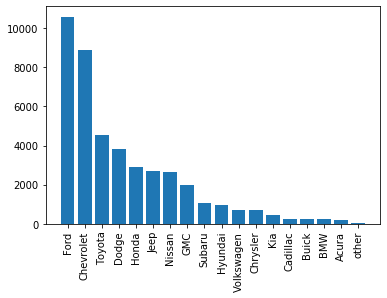

In [ ]:
import matplotlib.pyplot as plt
#ads_type_pivot = vehicles.pivot_table(index='model_counts_variable', values='model_price_variable')

#print(model_counts_variable.index)
modelrange = range(len(model_counts_variable.index))


plt.bar(modelrange, model_counts_variable,width=0.8, bottom=None, align='center')
plt.xticks(modelrange,model_counts_variable.index, rotation='vertical')
plt.show()
#plt.plot(x= model_counts_variable.index, y= model_counts_variable , kind='scatter')
#plt(x= model_counts_variable, y= model_price_variable , kind='scatter')

### Conclusion  
* The most popular vehicles were Ford and Chevrolet.  

Correlation between sell_age and price: -0.4332538296847899


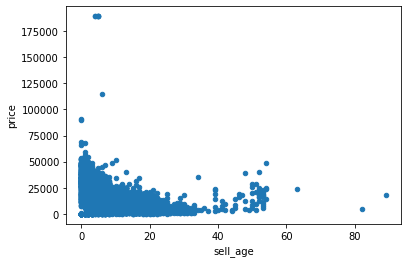

In [ ]:
Ford_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Ford_vehicles.plot(x='sell_age', y='price', kind='scatter')

print('Correlation between sell_age and price:' ,vehicles['sell_age'].corr(vehicles['price']))

### Conclusion  
* Based upon both the scatter chart and corr(), age and increased price are correlated.  According to the correlation coefficient, they have a negative correlation, i.e., the lower the age of the vehicle, the higher the price of the vehicle.  It's not a strong correlation but it does reflect that there is a connection between the two elements.  



Correlation between odometer reading and price: -0.39045901254348153


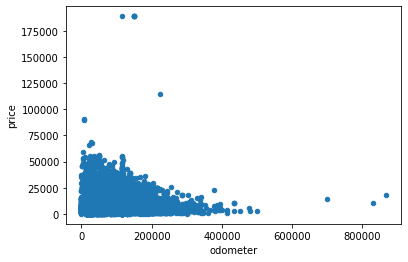

In [ ]:
Ford_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Ford_vehicles.plot(x='odometer', y='price', kind='scatter')

print('Correlation between odometer reading and price:' ,vehicles['odometer'].corr(vehicles['price']))

### Conclusion  
* Based upon both the scatter chart and corr(), odometer readings and increased price are correlated.  According to the correlation coefficient, they have a negative correlation, i.e., the lower odometer reading of the vehicle, the higher the price of the vehicle.  It's not a strong correlation but it does reflect that there is a connection between the two elements.



Correlation between vehicle condition and price: 0.2223939304983966


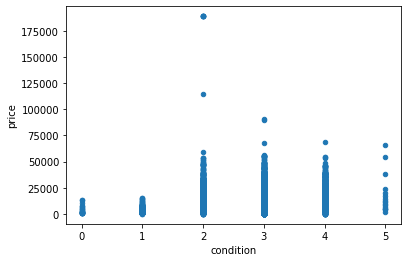

In [ ]:
Ford_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Ford_vehicles.plot(x='condition', y='price', kind='scatter')

print('Correlation between vehicle condition and price:' ,vehicles['condition'].corr(vehicles['price']))



### Conclusion  
* For the Ford vehicles, condition seems to be somewhat related to price.  Below 2 (good), the price of the vehicles drops dramatically.  Based upon that, I would expect that the vehicle price would continue upward based on increased condition ratings.  However, that isn't the case entirely.  Vehicles in the range of 2 to 4 seem to have very similar price ranges and vehicles in the range of 5 (highest rating) are a bit lower than those in 2-4.  Why that is, I'm not certain.  But I suspect that it has something to do with the fact that the vehicles in the range of 5 are new vehicles and most vehicles are posted for sale in the same year that they were purchased.  

* Additionally, based upon corr(), condition and increased price are correlated.  According to the correlation coefficient, they have a positive correlation, i.e., the better the condition of the vehicle, the higher the price of the vehicle.  It's not a strong correlation but it matches the results of the scatter plot which show the show that the two elements are at least somewhat related.

  

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


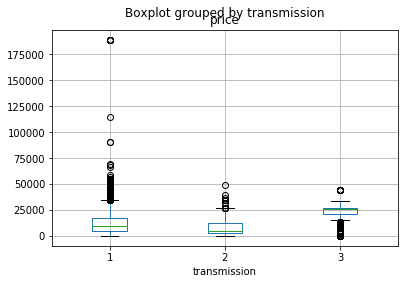

Correlation between price and type of transmission: 0.06234180672345733


In [ ]:
#numerical_transmission = {'automatic' : 1, 'manual' : 2, 'other' : 3}
#vehicles.replace({'automatic' : numerical_transmission, 'manual' : numerical_transmission, 'other' : numerical_transmission})

Ford_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Ford_vehicles.boxplot(column="price", by="transmission")
#Ford_vehicles.groupby['transmission']
plt.show()


print('Correlation between price and type of transmission:' ,vehicles['price'].corr(vehicles['transmission']))

### Conclusion  
* Based upon the box plot, price does seem to be impacted by transmission type with vehicles that have automatic transmissions falling into the higher price range.  The difference between automatic and manual don't seem to be great but there is a small difference

* Based upon corr(), transmission type and increased price are minimally correlated.  According to the correlation coefficient, they have a positive correlation, but it is very minimal.


In [ ]:
vehicles['paint_color'].unique()

vehicles["paint_color"]= vehicles["paint_color"].replace("", 0)
vehicles["paint_color"]= vehicles["paint_color"].replace("red", 1)
vehicles["paint_color"]= vehicles["paint_color"].replace("black", 2)
vehicles["paint_color"]= vehicles["paint_color"].replace("white", 3)
vehicles["paint_color"]= vehicles["paint_color"].replace("grey", 4)
vehicles["paint_color"]= vehicles["paint_color"].replace("silver", 5)
vehicles["paint_color"]= vehicles["paint_color"].replace("custom", 6)
vehicles["paint_color"]= vehicles["paint_color"].replace("orange", 7)
vehicles["paint_color"]= vehicles["paint_color"].replace("yellow", 8)
vehicles["paint_color"]= vehicles["paint_color"].replace("blue", 9)
vehicles["paint_color"]= vehicles["paint_color"].replace("brown", 10)
vehicles["paint_color"]= vehicles["paint_color"].replace("green", 11)
vehicles["paint_color"]= vehicles["paint_color"].replace("purple", 12)

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year_posted,month_posted,sell_age,float_sell_age,avg_mileage,model_category
0,9400,2011,bmw x5,2,6,gas,145000,1,SUV,0,1,2018-06-23,19,5,2018,6,7,7.0,20714,BMW
2,5500,2013,hyundai sonata,4,4,gas,110000,1,sedan,1,0,2019-02-07,79,3,2019,2,6,6.0,18333,Hyundai
3,1500,2003,ford f-150,1,8,gas,115323,1,pickup,0,0,2019-03-22,9,4,2019,3,16,16.0,7207,Ford
4,14900,2017,chrysler 200,3,4,gas,80903,1,sedan,2,0,2019-04-02,28,1,2019,4,2,2.0,40451,Chrysler
5,14990,2014,chrysler 300,3,6,gas,57954,1,sedan,2,1,2018-06-20,15,2,2018,6,4,4.0,14488,Chrysler


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


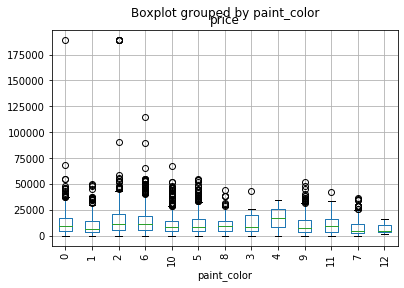

Correlation between price and paint color: -0.08985645455979956


In [ ]:
fordColors = Ford_vehicles['paint_color'].unique()
#modelrange = range(len(fordColors))
modelrange = range(1,len(fordColors)+1)
Ford_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Ford_vehicles.boxplot(column="price", by="paint_color")
plt.xticks(modelrange, fordColors, rotation='vertical')

plt.show()

print('Correlation between price and paint color:' ,vehicles['price'].corr(vehicles['paint_color']))

### Conclusion  
* Based upon the box plot, price does seem to be impacted by paint color, but the difference isn't great.  

* Based upon corr(), paint color and increased price are minimally correlated. According to the correlation coefficient, they have a negative correlation, but it is very minimal.

* Color seems to impact price but not to the same degree as the other elements examined.  Black vehicles seem to fall into the highest price range, followed by red, white, orange and purple.


Correlation between price and sell age: -0.4332538296847899


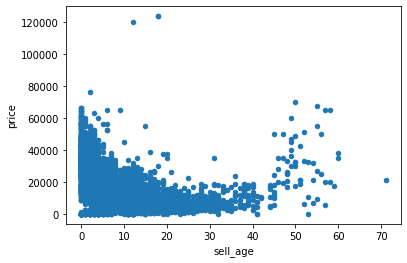

In [ ]:
Chevrolet_vehicles = vehicles[vehicles['model_category'] == 'Chevrolet']
Chevrolet_vehicles.plot(x='sell_age', y='price', kind='scatter')

print('Correlation between price and sell age:' ,vehicles['price'].corr(vehicles['sell_age']))

### Conclusion  
* As was the case with the Ford vehicles, based upon both the scatter chart and corr(), age and increased price are correlated.  According to the correlation coefficient, they have a negative correlation, i.e., the lower the age of the vehicle, the higher the price of the vehicle.  It's not a strong correlation, but it does reflect that there is a connection between the two elements.

Correlation between price and odometer: -0.39045901254348153


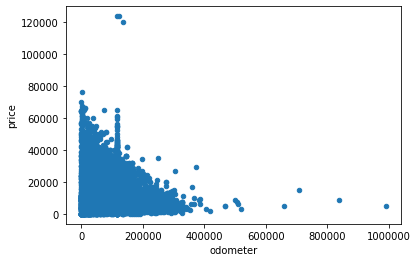

In [ ]:
Chevrolet_vehicles = vehicles[vehicles['model_category'] == 'Chevrolet']
Chevrolet_vehicles.plot(x='odometer', y='price', kind='scatter')

print('Correlation between price and odometer:' ,vehicles['price'].corr(vehicles['odometer']))

### Conclusion  
* Also, as was the case with Ford, based upon both the scatter chart and corr(), odometer readings and increased price are correlated.  According to the correlation coefficient, they have a negative correlation, i.e., the lower the odometer reading of the vehicle, the higher the price of the vehicle.  It's not a strong correlation, but it does reflect that there is a connection between the two elements.  

Correlation between price and condition: 0.22239393049839662


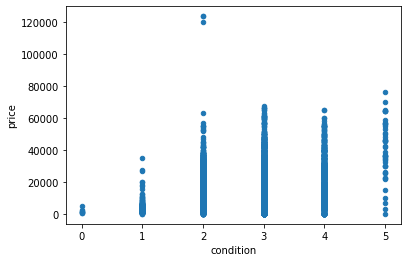

In [ ]:
Chevrolet_vehicles = vehicles[vehicles['model_category'] == 'Chevrolet']
Chevrolet_vehicles.plot(x='condition', y='price', kind='scatter')

print('Correlation between price and condition:' ,vehicles['price'].corr(vehicles['condition']))

### Conclusion  
* Based upon both the scatter chart and corr(), condition and increased price are correlated.  According to the correlation coefficient, they have a positive correlation, i.e., the better the condition of the vehicle, the higher the price of the vehicle.  It's not a strong correlation, but it does reflect that there is a connection between the two elements.

* Condition and price with the Chevrolet vehicles tend to follow the same pattern as that of the Ford vehicles with one slight exception.  For the Chevrolet vehicles, those in new condition (5), seem to have a bit of a higher price value than the others overall.


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


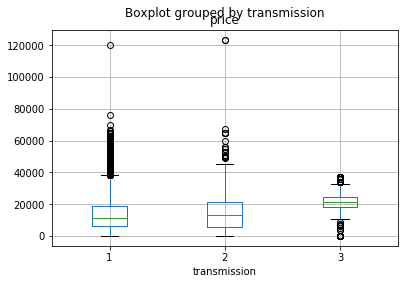

Correlation between price and transmission: 0.06234180672345733


In [ ]:
Chevrolet_vehicles = vehicles[vehicles['model_category'] == 'Chevrolet']
Chevrolet_vehicles.boxplot(column="price", by="transmission")
#Chevrolet_vehicles.groupby['transmission']
plt.show()

print('Correlation between price and transmission:' ,vehicles['price'].corr(vehicles['transmission']))

### Conclusion  
* Additionally, as was the case with Ford, based upon the box plot, price does seem to be impacted by transmission type with vehicles that have automatic transmissions falling into the higher price range. The difference between automatic and manual don't seem to be great but there is a small difference

* Based upon corr(), transmission type and increased price are minimally correlated. According to the correlation coefficient, they have a positive correlation, but it is very minimal.


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


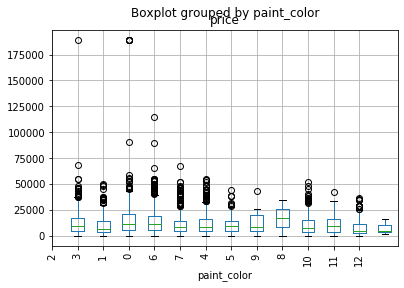

Correlation between price and paint color: -0.08985645455979956


In [ ]:
chevroletColors = Chevrolet_vehicles['paint_color'].unique()
modelrange = range(len(chevroletColors))
Chevrolet_vehicles = vehicles[vehicles['model_category'] == 'Ford']
Chevrolet_vehicles.boxplot(column="price", by="paint_color")
plt.xticks(modelrange, chevroletColors, rotation='vertical')

plt.show()

print('Correlation between price and paint color:' ,vehicles['price'].corr(vehicles['paint_color']))

### Conclusion  
* And finally, as was the case with Ford, there are slight differences in the values of Chevrolet vehicles based on color but not a significant difference.  

* Based upon the box plot, price does seem to be impacted by paint color, but the difference isn't great.  

* Based upon corr(), paint color and increased price are minimally correlated. According to the correlation coefficient, they have a negative correlation, but it is very minimal.


### Step 5. Overall conclusion

Factors that influence vehicle price:

In general, age at the time of sale, transmission, condition and odometer levels seem to impact the prices of vehicles.

* Vehicles ranging from age 0-5 seem to have the highest resell prices/values, with a significant drop in price coming after 10 years of sell_age.
* Vehicles with odometer readings of 100,000 miles and below have the highest resell prices/values, with a significant drop in price coming after 200,000 miles.  
* Vehicles with condition ratings between 2 and 4 (good and like new) have the highest resell prices/values overall.  With Chevrolet having a bit of a spike in value of vehicles with the number 5 rating.  
* Overall, the value of vehicles with automatic transmissions is higher than that of vehicles with manual transmissions with the difference in value generally being around $20,000.  
* And the value of vehicles based upon color doesn't seem to be significant.  The price differences are generally slight.
